<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/0511.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [ ]:
filters = np.zeros(shape=(7,7,channels, 2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

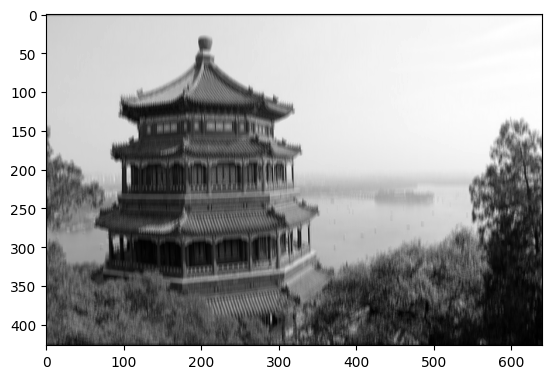

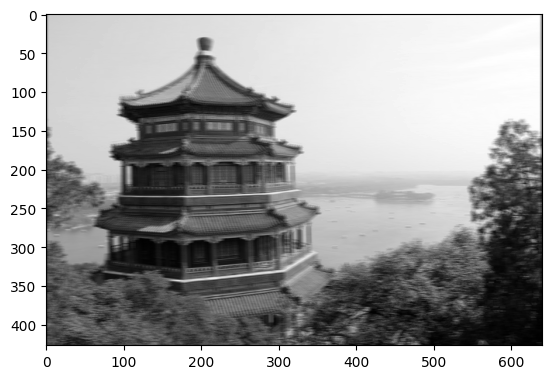

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')
plt.imshow(outputs[0,:,:,0], cmap='gray')
plt.show()
plt.imshow(outputs[0,:,:,1], cmap = 'gray')
plt.show()

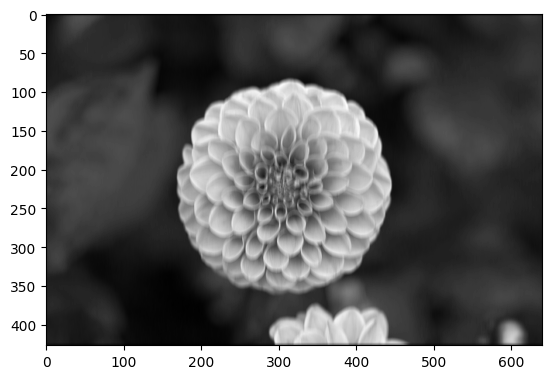

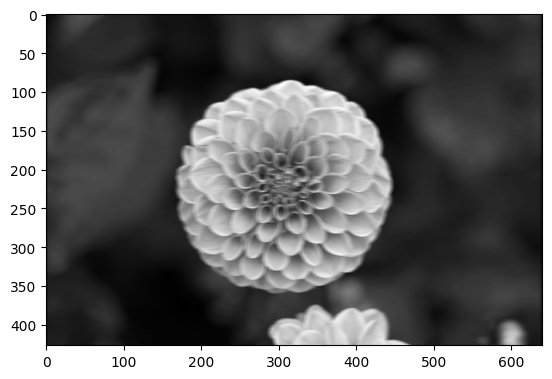

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')
plt.imshow(outputs[1,:,:,0], cmap='gray')
plt.show()
plt.imshow(outputs[1,:,:,1], cmap = 'gray')
plt.show()

In [ ]:
def crop(images):
  return images[150:220, 130:250]

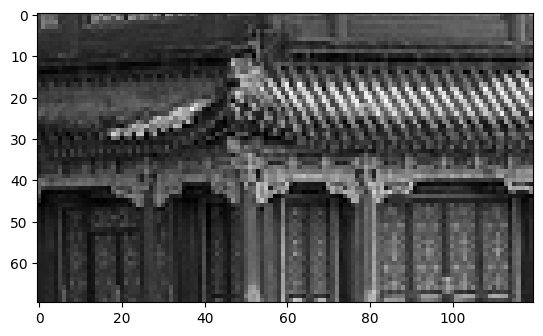

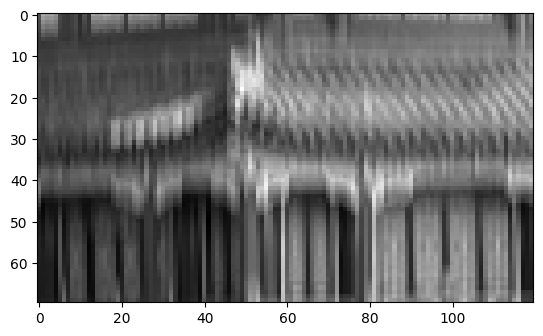

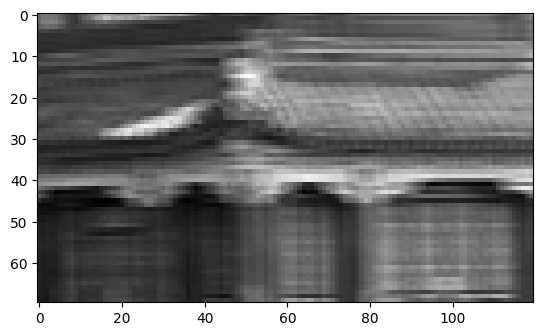

In [ ]:
plt.imshow(crop(images[0, :, :, 0]), cmap='gray')
plt.show()

for feature_map_index in (0,1):
  plt.imshow(crop(outputs[0, :, :, feature_map_index]), cmap='gray')
  plt.show()

In [ ]:
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([flower, china])
batch_size, height, width, channels = images.shape

In [ ]:
filters = np.zeros(shape=(7,7,channels, 2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

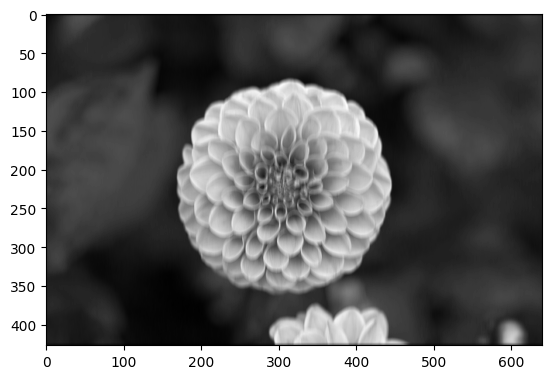

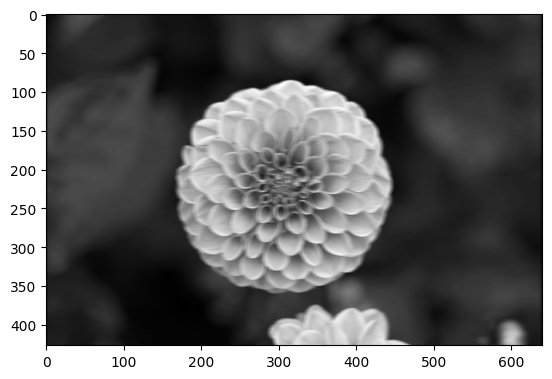

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')
plt.imshow(outputs[0,:,:,0], cmap='gray')
plt.show()
plt.imshow(outputs[0,:,:,1], cmap = 'gray')
plt.show()

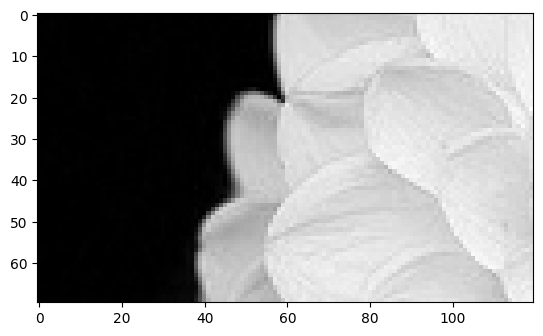

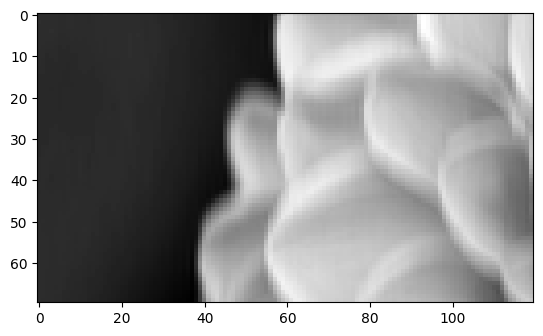

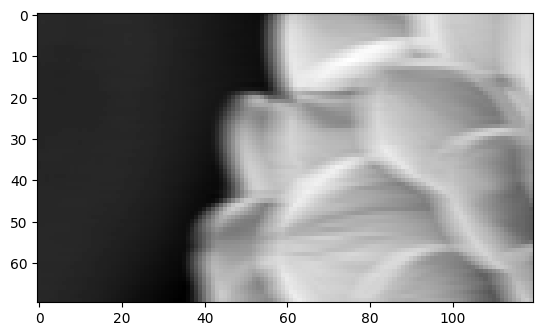

In [ ]:
plt.imshow(crop(images[1, :, :, 0]), cmap='gray')
plt.show()

for feature_map_index in (0,1):
  plt.imshow(crop(outputs[1, :, :, feature_map_index]), cmap='gray')
  plt.show()

In [ ]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[...,np.newaxis]
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.models.Sequential([keras.layers.Conv2D(64, 7, activation='relu', padding = 'same', input_shape=[28, 28, 1]),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(128, 3, activation='relu', padding = 'same'),
                                 keras.layers.Conv2D(128, 3, activation='relu', padding = 'same'),
                                 keras.layers.MaxPooling2D(2),
                                  keras.layers.Conv2D(256, 3, activation='relu', padding = 'same'),
                                 keras.layers.Conv2D(256, 3, activation='relu', padding = 'same'),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(64, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(10, activation='softmax')
                                 ])
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
model = keras.models.Sequential([keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test=model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 22s 13ms/step - loss: 8.3989 - val_loss: 8.2342
Epoch 2/10
1719/1719 [==============================] - 24s 14ms/step - loss: 8.2731 - val_loss: 8.2681
Epoch 3/10
1719/1719 [==============================] - 25s 14ms/step - loss: 8.2756 - val_loss: 8.2529
Epoch 4/10
1719/1719 [==============================] - 22s 13ms/step - loss: 8.2717 - val_loss: 8.2295
Epoch 5/10
1719/1719 [==============================] - 27s 16ms/step - loss: 8.2722 - val_loss: 8.2302
Epoch 6/10
1719/1719 [==============================] - 22s 13ms/step - loss: 8.2717 - val_loss: 8.2367
Epoch 7/10
1719/1719 [==============================] - 21s 12ms/step - loss: 8.2731 - val_loss: 8.2661
Epoch 8/10
1719/1719 [==============================] - 22s 13ms/step - loss: 8.2715 - val_loss: 8.2295
Epoch 9/10
1719/1719 [==============================] - 20s 12ms/step - loss: 8.2715 - val_loss: 8.2297
Epoch 10/10
313/313 [==============================] - 2s 5ms/st

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 8.2535


8.253530502319336